In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [18]:
# this function is used to visualise the confusion matrix for the model
def visualize_preds(table,y_true, y_pred, title):
    ls = []
    f = plt.figure(figsize = (8,8))
    cf = confusion_matrix(y_true, y_pred)
    sb.heatmap(cf, fmt='.0f', annot=True)
    
    accuracy  = np.trace(cf) / float(np.sum(cf))

    # Metrics for Binary Confusion Matrices
    if sum(cf[:,1]) == 0:
        precision = 0.0;
    else:
        precision = cf[1,1] / sum(cf[:,1])
        
    if sum(cf[1,:]) == 0:
        recall = 0.0;
    else:
        recall    = cf[1,1] / sum(cf[1,:])
        
    if (precision + recall) == 0:
        f1_score = 0.0;
    else:
        f1_score  = 2 *precision * recall / (precision + recall)
    stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
        accuracy,precision,recall,f1_score)
    
    ls.append(accuracy)
    ls.append(precision)
    ls.append(recall)
    ls.append(f1_score)
    ls = pd.DataFrame(ls)
    table = pd.concat([table,ls], axis = 1)
    
    plt.xlabel('Predicted' + stats_text)
    plt.ylabel('Actual')
    plt.title(title)
    
    return table

In [19]:
table1 = pd.DataFrame()
table2 = pd.DataFrame()

In [20]:
# importing clean data
cleanTrainData = pd.read_csv('clean-train-data.csv')
cleanTrainData = cleanTrainData.drop(['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE', 'Risk_Class'], axis = 1)
cleanTrainData.head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,3,13,0
1,7574516,40,10,9,13,0
2,3991815,66,4,4,10,0
3,6256451,41,2,2,12,1
4,5768871,47,11,3,14,1


# Classification of Train by Logistic Regression

In [21]:
# Getting the X_train, X_vali, y_train and y_vali data
y = pd.DataFrame(cleanTrainData_up['Risk_Flag'])
X = pd.DataFrame(cleanTrainData_up.drop('Risk_Flag',axis = 1))

# Split the Dataset into Train and Test
X_train, X_vali, y_train, y_vali = train_test_split(X, y, test_size = 0.25)

In [22]:
cleanTrainData_up.corr()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Income,1.000000,0.005636,-0.000529,0.003604,-0.003244,-0.006464
Age,0.005636,1.000000,-0.005357,0.017560,-0.014857,-0.033697
Experience,-0.000529,-0.005357,1.000000,0.668556,0.019777,-0.052163
CURRENT_JOB_YRS,0.003604,0.017560,0.668556,1.000000,0.007998,-0.025720
CURRENT_HOUSE_YRS,-0.003244,-0.014857,0.019777,0.007998,1.000000,-0.006284
Risk_Flag,-0.006464,-0.033697,-0.052163,-0.025720,-0.006284,1.000000


In [23]:
#Calculate the odd of a movie is good
print("The odds of having risk in train dataset is\t: ", y_train.value_counts()[1]/y_train.value_counts()[0])

#Perform the logistics regression
logreg1 = LogisticRegression()
 
#Fit the data
logreg1.fit(X_train,y_train)

#Print out the mean acuuracy
print("The overall classification accuracy \t\t: ", logreg1.score(X_vali,y_vali))

The odds of having risk in train dataset is	:  1.0015335756463357
The overall classification accuracy 		:  0.5011493004651499


/Users/eecheerlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


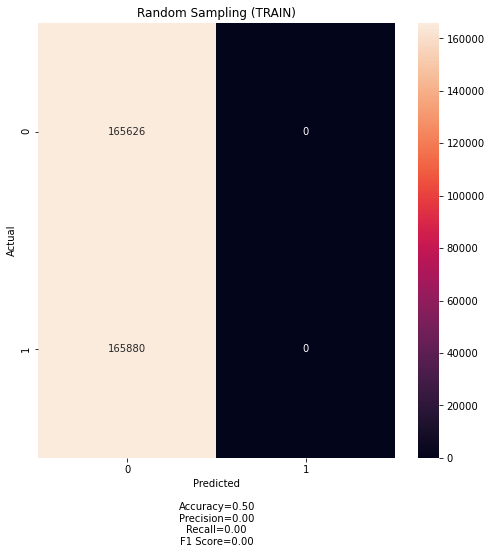

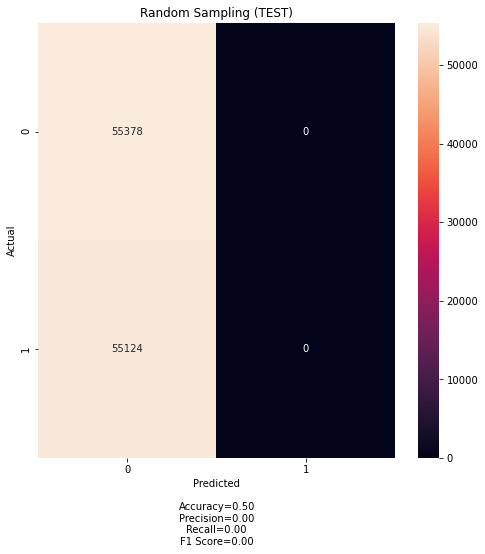

In [24]:
#Predicting the data
y_train_pred = logreg1.predict(X_train)
y_vali_pred = logreg1.predict(X_vali)

#Visualizing the data
table1 = visualize_preds(table1,y_train,y_train_pred, title = 'Random Sampling (TRAIN)')
table2 = visualize_preds(table2,y_vali,y_vali_pred, title = 'Random Sampling (TEST)')

Our logistic regression model has an accuracy of 0.5. Unlike linear regression where we use the predictors to predict the numeric response variable, logistic regression uses the predictors to predict a categorical response variable. Even though our logistic regression model may not be the most accurate, we have learnt that such a model to predict categorical variables exist and perhaps we can use it for other projects in the future.